 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [18]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [19]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods
class Video():
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
        
    

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [20]:
class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [21]:
# class Episode(Video):
#     def __init__(self, data): #<-- add data for passing in our ep
#         Video.__init__(self)
#         self.number = data['number']
#         self.season = data['season']
#         self.date_aired = data['airdate']
#         self.summary = data['summary']
#         self.rating = data['rating']['average']
#         self.title = data['name']
#         self.length = timedelta(minutes = data['runtime'])
#         if data['image']: 
#             self.link = data['image']['medium']
#         else:
#             self.link = generic_image
            
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
                    
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
            
                    
        # Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode erros: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        

In [22]:
first_show = Series()
first_show.get_info()

What is the name of the series?naruto
{'id': 495, 'url': 'https://www.tvmaze.com/shows/495/naruto', 'name': 'Naruto', 'type': 'Animation', 'language': 'Japanese', 'genres': ['Action', 'Adventure', 'Anime', 'Fantasy'], 'status': 'Ended', 'runtime': 30, 'averageRuntime': 30, 'premiered': '2002-10-03', 'ended': '2007-02-08', 'officialSite': 'http://www.tv-tokyo.co.jp/anime/naruto/index2.html', 'schedule': {'time': '19:30', 'days': ['Thursday']}, 'rating': {'average': 8.3}, 'weight': 94, 'network': {'id': 76, 'name': 'TV Tokyo', 'country': {'name': 'Japan', 'code': 'JP', 'timezone': 'Asia/Tokyo'}, 'officialSite': None}, 'webChannel': {'id': 20, 'name': 'Crunchyroll', 'country': None, 'officialSite': None}, 'dvdCountry': None, 'externals': {'tvrage': 4620, 'thetvdb': 78857, 'imdb': 'tt0409591'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/3/9744.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/3/9744.jpg'}, 'summary': "<p><b>Na

In [23]:
len(first_show)

220

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


now playing Enter: Naruto Uzumaki!


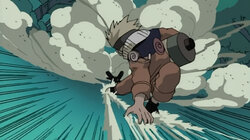

now playing My Name is Konohamaru!


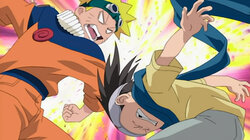

now playing Sasuke and Sakura: Friends or Foes?


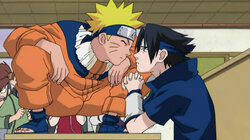

Are you still watching? also get a job y/nn


In [24]:
first_show.watch()

In [25]:
show_2 = Series()
show_2.get_info()

What is the name of the series?dragonball
Series error: status code 404
What is the name of the series?dbz
{'id': 44159, 'url': 'https://www.tvmaze.com/shows/44159/dmz', 'name': 'DMZ', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Fantasy', 'Science-Fiction'], 'status': 'Ended', 'runtime': None, 'averageRuntime': 59, 'premiered': '2022-03-17', 'ended': '2022-03-17', 'officialSite': 'https://play.hbomax.com/page/urn:hbo:page:GYhA0QwXRB2quwwEAAACg:type:series', 'schedule': {'time': '', 'days': []}, 'rating': {'average': 5.1}, 'weight': 95, 'network': None, 'webChannel': {'id': 329, 'name': 'HBO Max', 'country': None, 'officialSite': 'https://www.hbomax.com/'}, 'dvdCountry': None, 'externals': {'tvrage': None, 'thetvdb': 414938, 'imdb': 'tt11057226'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/398/997322.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/398/997322.jpg'}, 'summary': "<p>In the near future, a 

now playing Good Luck


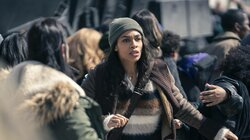

now playing Advent


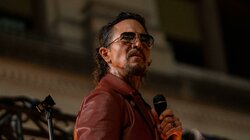

now playing The Good Name


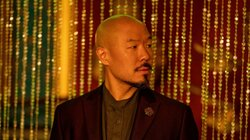

Are you still watching? also get a job y/nn


In [26]:
show_2.watch()

In [28]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    # add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    # choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user. ")
                
    #add to watchlist 
    def add_to_watch_list(self, query = ""):
        show = Series()
        
        show.get_info(query)
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
        
    # choose from our watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play_show()
        
        else:
            response = input(f"{watch} is not in your watch list.... would you like to add it y/n?")
            
            if response in ('yes', 'y'):
                self.add_to_watch_list(watch)
                
                print("...........")
                sleep(2)
                print("...........")
                self.watch_list[-1].play_show()
                
    # run function to drive program
    def run(self):
        """
        Method Allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
                What would you like to do?
                
                Search - Search for shows
                Watch - Pick something from your watch list
                Add - add a new user
                Quit - close the application            
            """)
            
        while True: 
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside! ")
                break
                
            else:
                print("Invalid input, please choose from the list! ")
    


In [30]:
Service = Theater()
Service.add_user()


What is the name of the new user? onitram52
Users: 
Onitram52
Choose a user: Onitram52


##  Exercise 1:
Discuss what other classes we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [25]:
#when i look up a show I usually like to know who is in it so I'll attempt to make a class for checking cast and crew
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep


class CnC:
    def __init__(self):
        pass
        
    def get_show_cast(self, show_name):
        show_url = f"http://api.tvmaze.com/singlesearch/shows?q={show_name}"
        show_data = requests.get(show_url).json()
        try:
            cast_data = requests.get(show_data["_links"]["cast"]["href"]).json()
            cast_list = []
            for member in cast_data:
                cast_list.append(member["person"]["name"])
            return cast_list
        except KeyError:
            return "Cast information for this show is not available"
    
    def get_show_crew(self, show_name):
        show_url = f"http://api.tvmaze.com/singlesearch/shows?q={show_name}"
        show_data = requests.get(show_url).json()
        try:
            crew_data = requests.get(show_data["_links"]["crew"]["href"]).json()
            crew_list = []
            for member in crew_data:
                crew_list.append(member["person"]["name"])
            return crew_list
        except KeyError:
            return "Crew information for this show is not available"
        
search = CnC()
show_name = input("What show would you like to see the cast of?: ")
cst = search.get_show_cast(show_name)
print(cst)


show_name = input("What show would you like to see the crew of?: ")
crw = search.get_show_crew(show_name)
print(crw)

#I kept getting key errors(lines 16 and 28) with the inital way it was coded. 
#im not sure why it wont give me the info im looking for. I added lines 21 and 34 to at least make the code functional
#but still cannot get the info on cast or crew

What show would you like to see the cast of?: naruto
Cast information for this show is not available
What show would you like to see the crew of?: naruto
Crew information for this show is not available
